In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import pickle as pkl
import seaborn as sns
import os
import statsmodels.api as sm
from scipy import stats

from lik_models import *
from helper_funcs import *
from plotting_funcs import *
from mcmc_data import *

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
mcmc = mcmc_data(count_matrix_fn='data/pancreas_beta_development_e_14_5.raw_count_matrix.tsv',
                          pkl_dir='outputs/e14_5_pancreas_beta_development/',
                          tfs_fn='data/mouse_transcription_factors_zhou_et_al.txt',
                          name='e14.5 Pancreas Beta Development')

#load in all pkls
mcmc.load_pkls(sub_tfs=False)

#get best fitting genes
mcmc.get_top_genes(n_top=50,sub_tf=False)

Loading Count Matrix...
Normalizing Count Matrix...
Loading pkls...


In [3]:
gene = 'Neurog3'

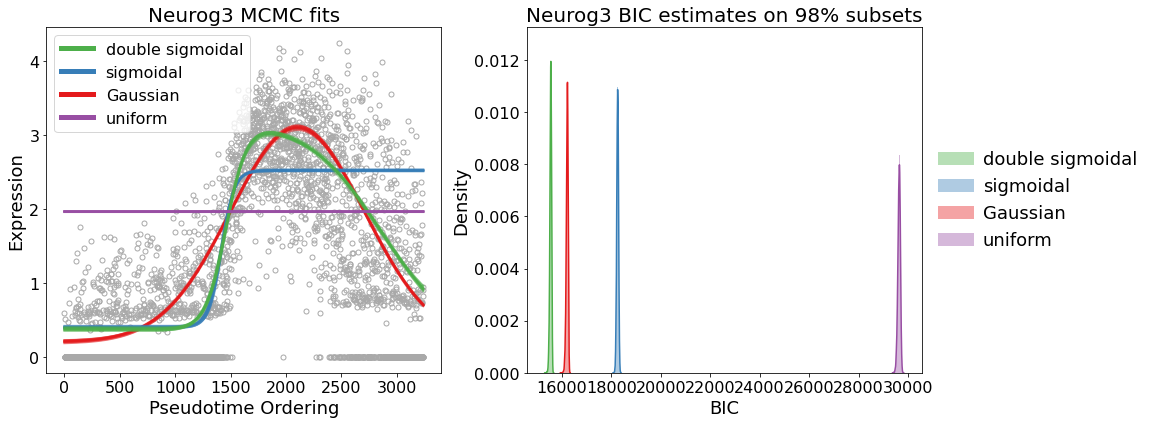

In [4]:
fig = make_joint_fit_and_bic_estimate_plot(mcmc,gene)

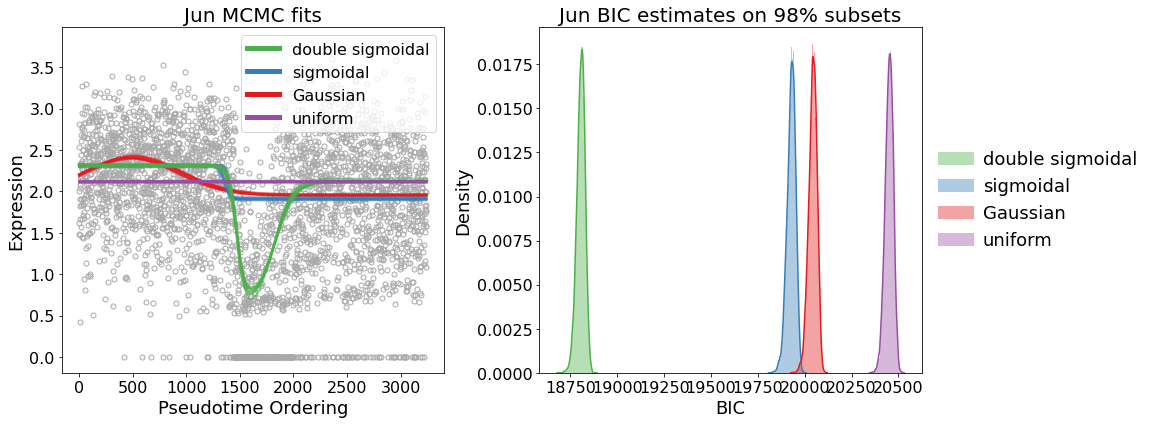

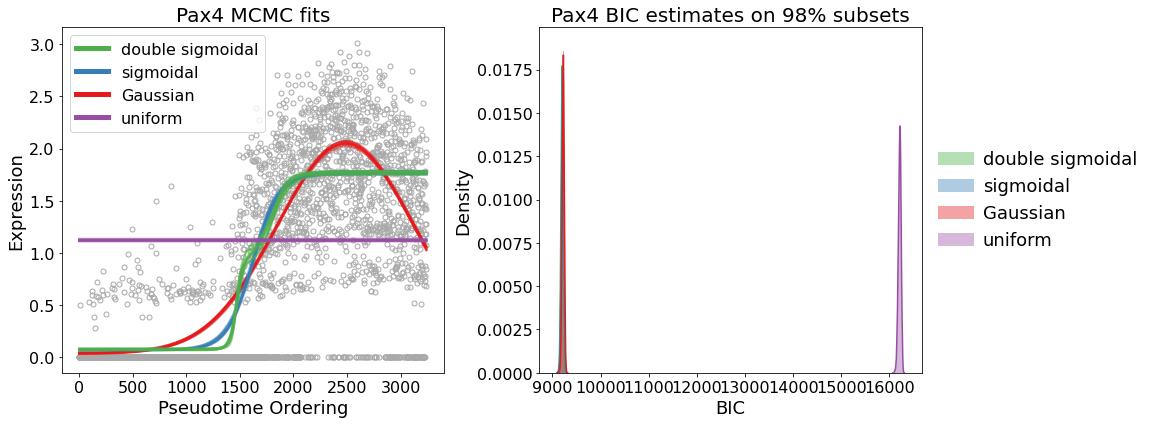

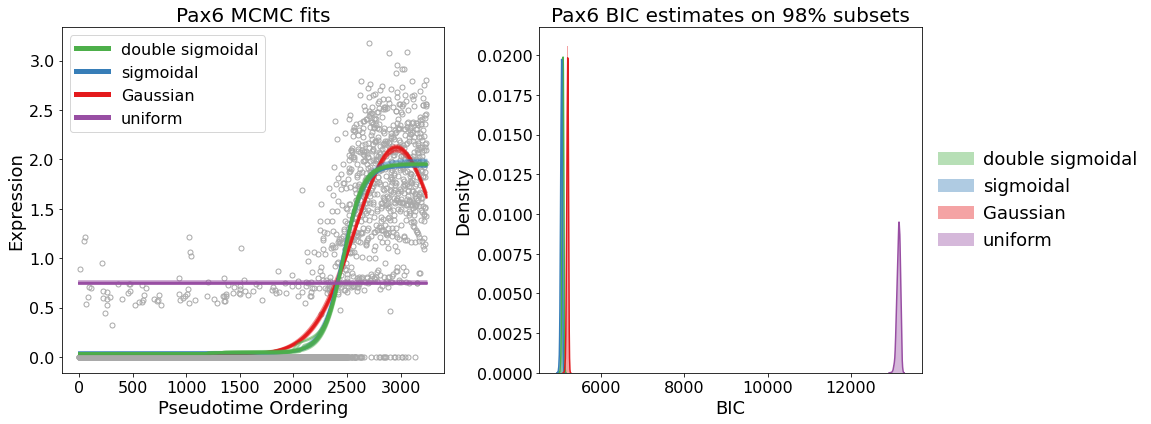

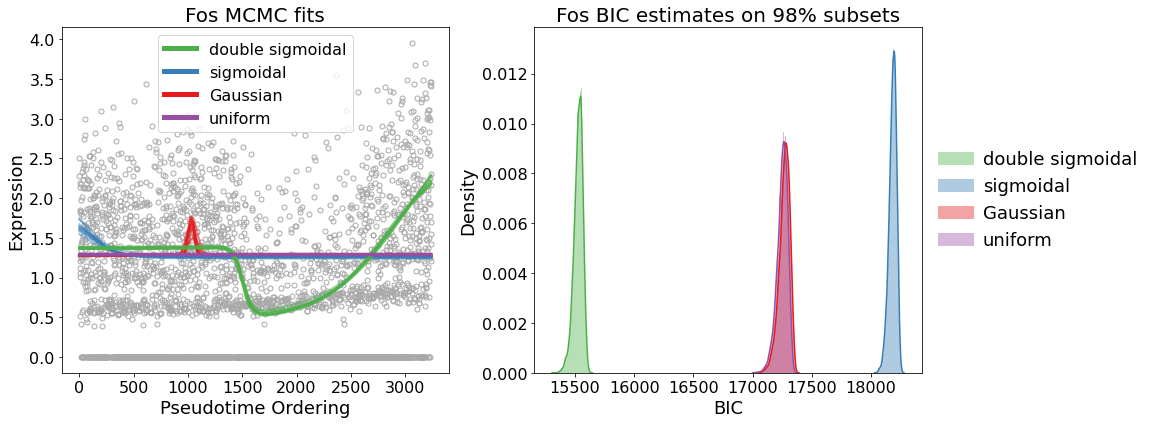

In [5]:
for gene_iter in ['Jun','Pax4','Pax6','Fos']:
    fig = make_joint_fit_and_bic_estimate_plot(mcmc,gene_iter)
    plt.show()

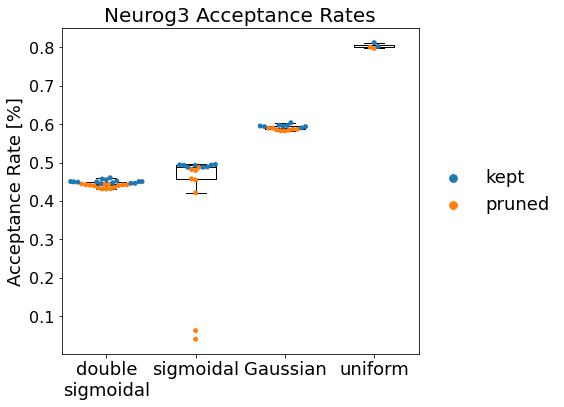

In [6]:
fig = make_acceptance_fraction_plot(mcmc,gene)

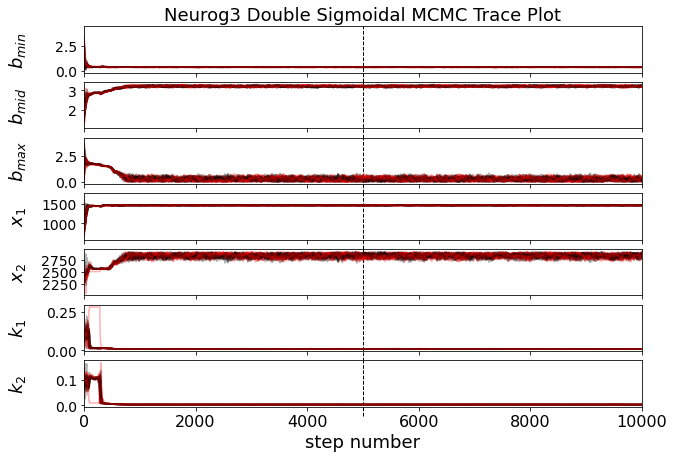

In [7]:
fig = make_mcmc_trace_plot(mcmc,gene,mcmc.best_fits[gene],sub_in_red=True)

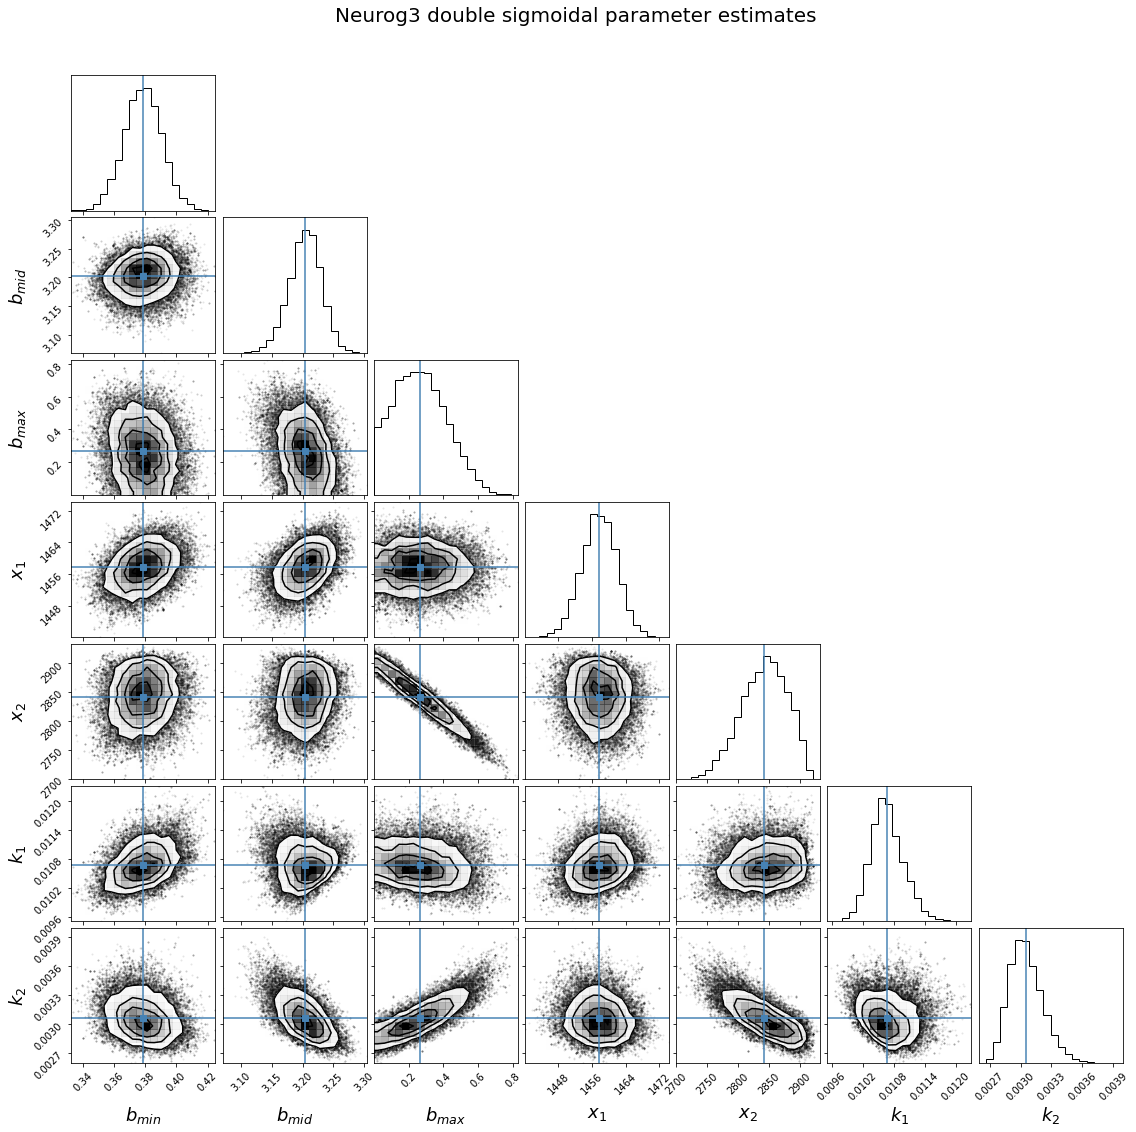

In [8]:
fig = make_corner_plot(mcmc,gene,mcmc.best_fits[gene],n_discard=5000,use_max_args=True)
plt.show()

Text(0.5, 1.0, 'Transcriptional cascade e14.5 pancreas beta development')

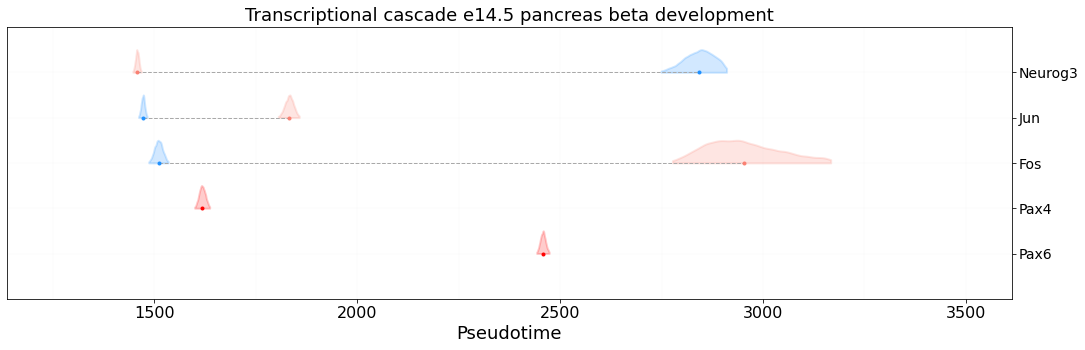

In [9]:
fig = plot_transcriptional_cascade(mcmc,title=None, figsize=(18,5), tfs=mcmc.genes_good_fit)
ax = plt.gca()
plt.ylim(-len(mcmc.genes_good_fit),1)
plt.title('Transcriptional cascade e14.5 pancreas beta development',fontsize=18)

In [10]:
autocorrelations = {}
iter_ = 0
for j,pkl_fn in enumerate(os.listdir(mcmc.pkl_dir)):
    if 'autocorrelation' not in pkl_fn: continue
    iter_ += 1
    gene = pkl_fn.split(".auto")[0]
    if iter_%100 == 0: print(iter_, gene)
    autocorrelations[gene] = pkl.load(open(mcmc.pkl_dir+pkl_fn,'rb'))

In [11]:
autocorrelations[gene].keys()

dict_keys(['acf_params_tot', 'auto_corr_length_int', 'autocorr_time_estimates'])

In [12]:
gene

'Fos'

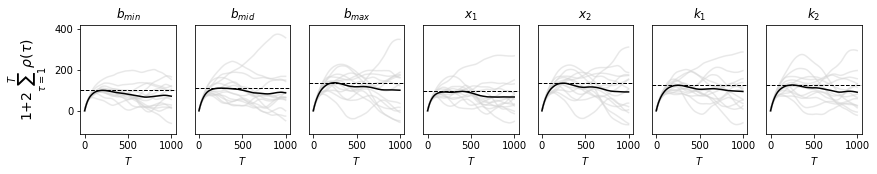

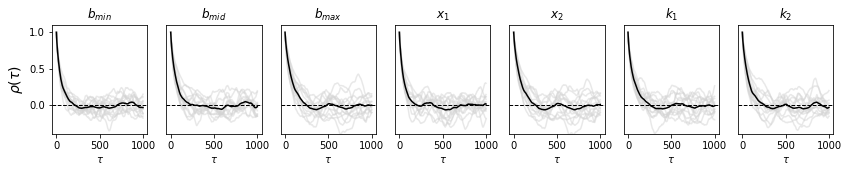

In [13]:
fig = plot_autocorr_time_esimates(mcmc,gene,autocorrelations)
plt.show()
fig = plot_autocorrelation_func(mcmc,gene,autocorrelations)
plt.show()

Inflec 1 overlap:  p=0.094
70000
Inflec 2 overlap:  p<7.00e+04


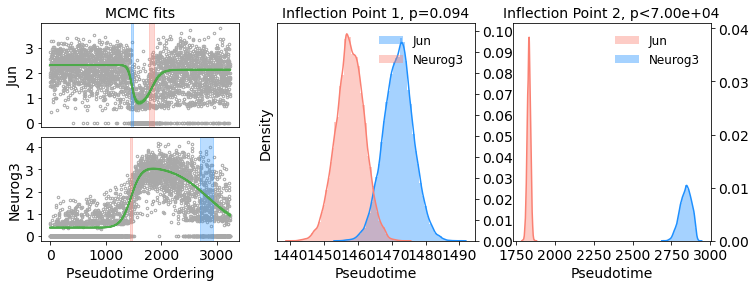

In [14]:
gene1 = 'Jun'
gene2 = 'Neurog3'

fig = make_inflec_point_comp_plot(mcmc,gene1,gene2)

Inflec 1 overlap:  p=7.14e-05
Inflec 2 overlap:  p=0.366


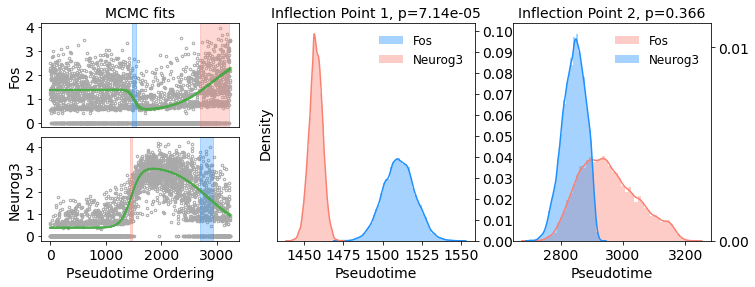

In [15]:
gene1 = 'Fos'
gene2 = 'Neurog3'

fig = make_inflec_point_comp_plot(mcmc,gene1,gene2)